<a href="https://colab.research.google.com/github/deshanahan/DATA-602-Homework/blob/main/NLP_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.tsv to train.tsv


In [2]:
import pandas as pd
import io
train = pd.read_csv(io.BytesIO(uploaded['train.tsv']), sep='\t')
train_df = pd.DataFrame(data=train, columns = ['Phrase', 'Sentiment'])
train_df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

There are 156060 rows in the dataset.  Interestingly, the mean is just a little over 2, which means that more of the rows received a relatively positive sentiment than negative.

In [3]:
train_df.describe()

,Sentiment
count,156060.000000
mean,2.063578
std,0.893832
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [4]:
train_df.shape

(156060, 2)

Here we have a normalized distribution and we confirm that there were slightly more positive sentiment phrases in the rows than there were negative, but there were more neutral sentiment rows than any other.

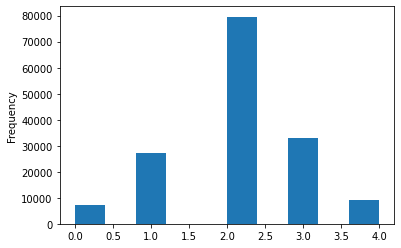

In [5]:
train_df['Sentiment'].plot.hist()

The functions crashed my computer when taking the entire dataset, so I stopped them at 100000 rows.

In [6]:
from sklearn.feature_extraction import text

vectorizer = text.CountVectorizer(binary=True).fit(train_df['Phrase'][:100000])
vectorized = vectorizer.transform(train_df['Phrase'][:100000])
print(vectorized.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
from nltk.tokenize import RegexpTokenizer
tk = RegexpTokenizer('\s+', gaps = True)
tokens = []
for phrase in train_df['Phrase']:
  tokens.append(tk.tokenize(phrase))
tokens[:5]

[['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  ',',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amounts',
  'to',
  'much',
  'of',
  'a',
  'story',
  '.'],
 ['A',
  'series',
  'of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['A', 'series'],
 ['A'],
 ['series']]

In [8]:
X = vectorized
y = train_df['Sentiment'][:100000]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

The train data was 69% accurate, while the test data was 61% accurate.  This measured the Multinomial Naive Bayes model's accuracy in predicting the sentiment of the phrases in the dataset, so the model was 61% accurate in predicting the sentiment of phrases that it did not see.  I would not feel comfortable using this to predict the sentiment of future data because it is not high enough.  If we add more phrases and sentiment scores to the dataset, we should see an increase in the model's accuracy score.

In [9]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
yhat_train = nb.predict(X_train)
yhat_test = nb.predict(X_test)

from sklearn.metrics import accuracy_score
print('Training Score:', round(accuracy_score(y_train, yhat_train), 2))
print('Test Score:', round(accuracy_score(y_test, yhat_test), 2))

Training Score: 0.69
Test Score: 0.61


In [10]:
vectorizer = text.TfidfVectorizer(binary=True).fit(train_df['Phrase'][:100000])
vectorized = vectorizer.transform(train_df['Phrase'][:100000])
print(vectorized.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
X = vectorized
y = train_df['Sentiment'][:100000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
yhat_train = nb.predict(X_train)
yhat_test = nb.predict(X_test)

from sklearn.metrics import accuracy_score
print('Training Score:', round(accuracy_score(y_train, yhat_train), 2))
print('Test Score:', round(accuracy_score(y_test, yhat_test), 2))

Training Score: 0.64
Test Score: 0.59


While the CountVectorizer had worse overfitting than the TfidfVectorizer, the test score on CountVectorizer was slightly better than that of TfidfVectorizer.